#                  Rain Prediction Project

---




##  Project Overview
This project is about building a machine learning model that can predict if it will rain tomorrow or not.  
We will use weather data collected daily in Australia over about 10 years.  
The goal is to help people make better decisions, like carrying an umbrella or planning farming activities.

##  About the Dataset
- **Source:** Bureau of Meteorology, Australia.
- **Period:** About 10 years of daily weather records.
- **Records:** Thousands of daily observations.
- **Target Column:** `RainTomorrow` (Yes or No) — Will it rain tomorrow?

##  Features Description
| Column | Description |
| :--- | :--- |
| Date | Date of the weather record |
| Location | City or location name |
| MinTemp | Minimum temperature for the day (°C) |
| MaxTemp | Maximum temperature for the day (°C) |
| Rainfall | Amount of rain that fell (mm) |
| Evaporation | Amount of water evaporated (mm) |
| Sunshine | Hours of sunshine during the day |
| WindGustDir | Direction of the strongest wind gust |
| WindGustSpeed | Speed of the strongest wind gust (km/h) |
| WindDir9am | Wind direction at 9 AM |
| WindDir3pm | Wind direction at 3 PM |
| WindSpeed9am | Wind speed at 9 AM |
| WindSpeed3pm | Wind speed at 3 PM |
| Humidity9am | Humidity at 9 AM (%) |
| Humidity3pm | Humidity at 3 PM (%) |
| Pressure9am | Air pressure at 9 AM (hPa) |
| Pressure3pm | Air pressure at 3 PM (hPa) |
| Cloud9am | Cloud cover at 9 AM |
| Cloud3pm | Cloud cover at 3 PM |
| Temp9am | Temperature at 9 AM (°C) |
| Temp3pm | Temperature at 3 PM (°C) |
| RainToday | Did it rain today? (Yes or No) |
| RainTomorrow | **(Target)** Will it rain tomorrow? (Yes or No) |

## Project Goal
- Predict the value of `RainTomorrow` (Yes or No).
- Use all other columns as inputs to the model.
- Build a good model that we can later deploy and use.

---



# 1. Data Loading
In this section, we import the necessary libraries and load the dataset for analysis.

## 1.1 Importing Required Libraries

In this step, we import all the Python libraries we need to load the data, handle missing values, explore the dataset, and later build machine learning models.

###  Libraries Used:

- `pandas` → for loading and working with tabular data (CSV files)
- `numpy` → for numerical operations and handling arrays
- `matplotlib.pyplot` & `seaborn` → for data visualization
- `sklearn` → for building and evaluating machine learning models
- `warnings` → to ignore unnecessary warning messages during exploration

More


In [ ]:
# Import libraries
import os
import pandas as pd
import numpy as np

from scipy.stats import skew, norm, kurtosis
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [ ]:
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

%matplotlib inline

In [ ]:
 # Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Machine Learning
# knn imputer
from sklearn.impute import KNNImputer

# Warnings
import warnings
warnings.filterwarnings('ignore')


#  Project Styling and Visualization Settings

In this section, we set up the visual style for all our plots and data displays.  
Good styling makes the project easier to understand and more professional.

Here is what we changed:
- **Color Palette:** We chose blue and purple tones to match the rain theme.
- **Seaborn Style:** We used `whitegrid` for clean and clear backgrounds.
- **Context:** We used `talk` mode to make fonts bigger and easier to read.
- **Plot Sizes:** We made plots bigger so that labels and data points are easy to see.
- **Pandas Display:** We allowed pandas to show more columns and formatted numbers nicely.

These settings will apply to all visualizations in the notebook, making everything look clean, consistent, and beautiful!



In [ ]:
# Basic Libraries
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

# New Professional Color Palette (Rain + Nature + Contrast)
rain_colors = [
    "#1f77b4",  # Deep Blue
    "#2ca02c",  # Forest Green
    "#17becf",  # Soft Cyan
    "#7f7f7f",  # Neutral Gray
    "#bcbd22",  # Yellow-Green
    "#d62728",  # Red for Highlights
    "#9467bd",  # Professional Purple
    "#8c564b",  # Earthy Brown
    "#aec7e8",  # Light Blue
    "#98df8a"   # Light Green
]

# Set Seaborn Palette
palette = sns.color_palette(rain_colors)
sns.set_palette(palette)

# Set style and context
sns.set_style("whitegrid")      # Clean grid background
sns.set_context("talk")         # Larger fonts for presentation

# General Plot Settings
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Pandas Display Settings
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 100)

palette  # Preview the updated palette


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353)]

##1.2 Load Dataset
We load the dataset and take an initial look at its structure.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Exploratory Data Analysis (EDA)

We perform an initial exploration of the dataset to understand its structure, detect missing values, outliers, and basic statistics.

In [ ]:
#louding data in dataframe in var data
data = pd.read_csv("/content/drive/MyDrive/datasets/weatherAUS.csv")
# df=pd.read_csv("/content/drive/MyDrive/datasets/weatherAUS.csv")
#data = pd.read_csv("/content/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,W,WNW,20.00,24.00,71.00,22.00,"1,007.70","1,007.10",8.00,NaN,16.90,21.80,No,No
1,2008-12-02,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00,NNW,WSW,4.00,22.00,44.00,25.00,"1,010.60","1,007.80",NaN,NaN,17.20,24.30,No,No
2,2008-12-03,Albury,12.90,25.70,0.00,NaN,NaN,WSW,46.00,W,WSW,19.00,26.00,38.00,30.00,"1,007.60","1,008.70",NaN,2.00,21.00,23.20,No,No
3,2008-12-04,Albury,9.20,28.00,0.00,NaN,NaN,NE,24.00,SE,E,11.00,9.00,45.00,16.00,"1,017.60","1,012.80",NaN,NaN,18.10,26.50,No,No
4,2008-12-05,Albury,17.50,32.30,1.00,NaN,NaN,W,41.00,ENE,NW,7.00,20.00,82.00,33.00,"1,010.80","1,006.00",7.00,8.00,17.80,29.70,No,No


## 2.1 Dataset Information
We check the data types, number of non-null entries, and memory usage.

In [ ]:
data.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
119829,2015-04-09,PerthAirport,17.20,25.40,4.20,1.00,0.00,NE,48.00,ENE,NE,17.00,15.00,95.00,92.00,"1,015.60","1,012.50",8.00,8.00,19.10,20.90,Yes,Yes
78710,2010-12-23,Watsonia,11.70,19.60,0.00,6.60,10.60,SSW,43.00,SW,SSW,11.00,22.00,66.00,50.00,"1,022.10","1,024.20",5.00,5.00,15.00,19.20,No,No
59322,2012-03-25,Bendigo,5.70,19.20,0.00,NaN,NaN,SW,35.00,S,SSE,7.00,11.00,64.00,47.00,"1,022.90","1,021.40",7.00,6.00,12.80,17.70,No,No
62138,2011-09-14,Sale,4.10,18.10,0.00,5.00,9.40,WSW,67.00,WNW,WSW,28.00,35.00,51.00,54.00,"1,015.90","1,016.90",7.00,5.00,15.70,16.00,No,No
134004,2011-08-31,Launceston,4.70,14.60,0.00,NaN,NaN,NNW,22.00,NaN,NNW,0.00,6.00,96.00,60.00,"1,020.50","1,019.60",NaN,NaN,8.20,14.40,No,No
15106,2008-12-31,Newcastle,15.40,33.40,0.00,NaN,NaN,NaN,NaN,NaN,NW,0.00,15.00,50.00,23.00,NaN,NaN,0.00,0.00,23.80,32.20,No,No
83833,2017-01-03,Dartmoor,13.00,22.30,0.00,NaN,NaN,ESE,44.00,SE,SE,22.00,28.00,63.00,51.00,"1,022.50","1,020.30",NaN,NaN,15.80,21.40,No,No
108582,2008-12-12,Albany,14.60,21.00,0.20,6.20,8.70,NaN,NaN,SW,SW,17.00,30.00,72.00,64.00,"1,018.10","1,016.60",8.00,1.00,17.70,19.60,No,No
5073,2014-10-24,BadgerysCreek,15.60,30.20,0.00,NaN,NaN,NNE,35.00,NW,NNE,2.00,20.00,75.00,42.00,"1,020.20","1,013.40",NaN,NaN,20.10,29.20,No,No
10478,2013-01-21,CoffsHarbour,20.20,25.90,2.00,0.80,0.00,WSW,35.00,WSW,SSW,22.00,24.00,81.00,73.00,"1,014.20","1,012.50",8.00,8.00,22.30,25.50,Yes,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
data.shape

(145460, 23)

The shape of the dataset is `(145460, 23)`, which means it contains:

- **145,460 rows** (samples)
- **23 columns** (features)

In [ ]:
data.nunique().sort_values(ascending = False)

,0
Date,3436
Rainfall,681
Pressure3pm,549
Pressure9am,546
MaxTemp,505
Temp3pm,502
Temp9am,441
MinTemp,389
Evaporation,358
Sunshine,145


In [ ]:
data.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


### Key Observations

 **Date Column**:
   - The "Date" column should be in the correct date format. Converting it to datetime type can help with time analysis.



##2.2 Summary Statistics
We generate descriptive statistics to understand the distributions and identify potential anomalies.

In [ ]:
summary=data.describe()
summary

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,"143,975.00","144,199.00","142,199.00","82,670.00","75,625.00","135,197.00","143,693.00","142,398.00","142,806.00","140,953.00","130,395.00","130,432.00","89,572.00","86,102.00","143,693.00","141,851.00"
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,"1,017.65","1,015.26",4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,"1,012.90","1,010.40",1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,"1,017.60","1,015.20",5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,"1,022.40","1,020.00",7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,"1,041.00","1,039.60",9.00,9.00,40.20,46.70


##2.4 Duplicates Check
Check if there are duplicated rows.

In [ ]:
data.duplicated().sum()

np.int64(0)

### Key Observations
- **Total Duplicates**: 0

This means there are no duplicate rows in the dataset, which is good for data integrity.

#4. Data Classification

We will separate the data into numerical and categorical groups. This distinction will allow us to handle each type of data appropriately and apply relevant analysis techniques for each category. This section is independent from the previous summaries.

In [ ]:
categ_data =data.select_dtypes(include='object')
categ_data

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


In [ ]:
numer_data =data.select_dtypes(exclude='object')
numer_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.40,22.90,0.60,NaN,NaN,44.00,20.00,24.00,71.00,22.00,"1,007.70","1,007.10",8.00,NaN,16.90,21.80
1,7.40,25.10,0.00,NaN,NaN,44.00,4.00,22.00,44.00,25.00,"1,010.60","1,007.80",NaN,NaN,17.20,24.30
2,12.90,25.70,0.00,NaN,NaN,46.00,19.00,26.00,38.00,30.00,"1,007.60","1,008.70",NaN,2.00,21.00,23.20
3,9.20,28.00,0.00,NaN,NaN,24.00,11.00,9.00,45.00,16.00,"1,017.60","1,012.80",NaN,NaN,18.10,26.50
4,17.50,32.30,1.00,NaN,NaN,41.00,7.00,20.00,82.00,33.00,"1,010.80","1,006.00",7.00,8.00,17.80,29.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.80,23.40,0.00,NaN,NaN,31.00,13.00,11.00,51.00,24.00,"1,024.60","1,020.30",NaN,NaN,10.10,22.40
145456,3.60,25.30,0.00,NaN,NaN,22.00,13.00,9.00,56.00,21.00,"1,023.50","1,019.10",NaN,NaN,10.90,24.50
145457,5.40,26.90,0.00,NaN,NaN,37.00,9.00,9.00,53.00,24.00,"1,021.00","1,016.80",NaN,NaN,12.50,26.10
145458,7.80,27.00,0.00,NaN,NaN,28.00,13.00,7.00,51.00,24.00,"1,019.40","1,016.50",3.00,2.00,15.10,26.00


#5. Outlier Detection
Data Distribution and Outliers for numerical_data





####for Outliers

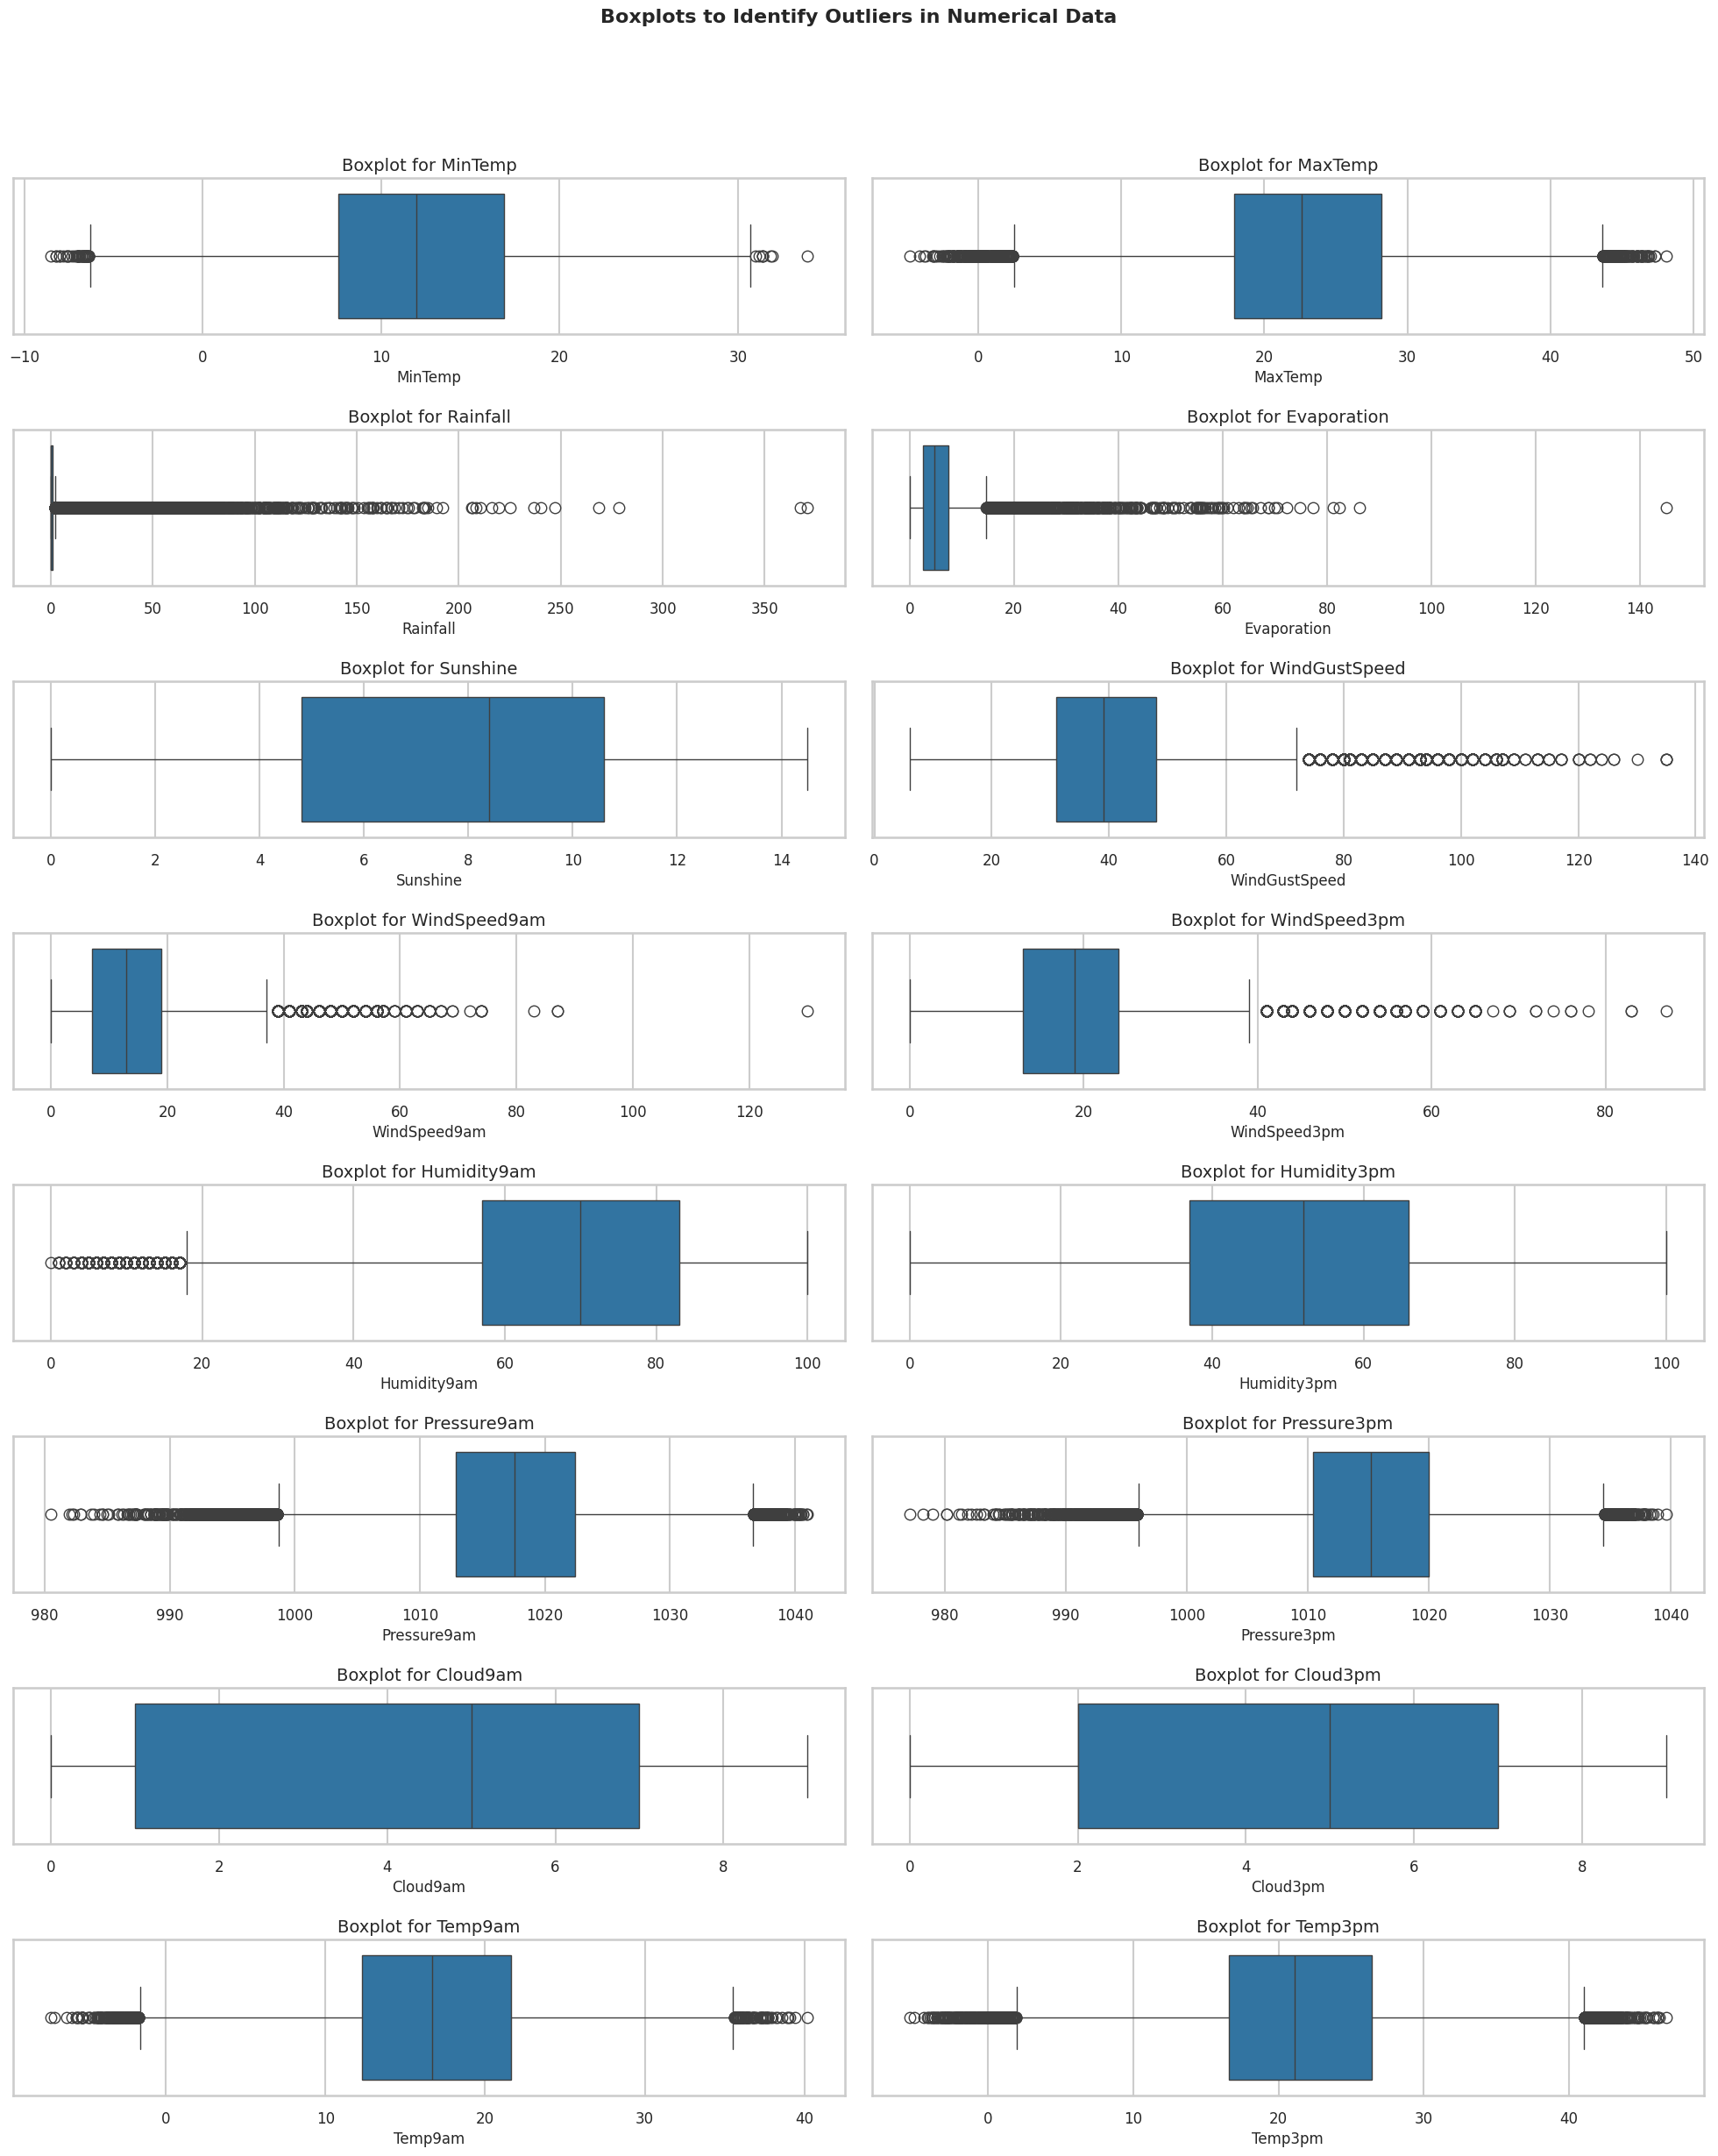

In [ ]:
# Number of numerical columns
n = numer_data.shape[1]

# Set the figure size based on the number of numerical columns
plt.figure(figsize=(20, n * 3))

# Create boxplots for each numerical column
for i, col in enumerate(numer_data.columns, 1):
    plt.subplot(n, 2, i)
    sns.boxplot(data=numer_data, x=col)
    plt.title(f"Boxplot for {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

# Overall title for the entire figure
plt.suptitle("Boxplots to Identify Outliers in Numerical Data", fontsize=16, weight='bold')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()

#  Data Preprocessing: Date Processing and Missing Values Handling

In this section, we will prepare the dataset for exploration and modeling by handling the `Date` column and treating missing values appropriately.


 I identified the outliers by looking for points outside the whiskers.

In [ ]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].dtypes

dtype('<M8[ns]')


##  1.1 Convert "Date" Column to Datetime

- Convert the `Date` column from object/string type to a proper `datetime` format.
- This conversion will help us handle time-based analysis and feature extraction.


In [ ]:
data['Date'].isna().sum()

np.int64(0)

In [ ]:
data['Date'].head()

,Date
0,2008-12-01
1,2008-12-02
2,2008-12-03
3,2008-12-04
4,2008-12-05


### Observation on Data Conversion

converting the columns in the DataFrame `data` to a datetime type, the resulting datatype

In [ ]:
# Assuming 'data' is your DataFrame with a 'Date' column of datetime type
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,2008-12-01,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,W,WNW,20.00,24.00,71.00,22.00,"1,007.70","1,007.10",8.00,NaN,16.90,21.80,No,No,1,12,2008
1,2008-12-02,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00,NNW,WSW,4.00,22.00,44.00,25.00,"1,010.60","1,007.80",NaN,NaN,17.20,24.30,No,No,2,12,2008
2,2008-12-03,Albury,12.90,25.70,0.00,NaN,NaN,WSW,46.00,W,WSW,19.00,26.00,38.00,30.00,"1,007.60","1,008.70",NaN,2.00,21.00,23.20,No,No,3,12,2008
3,2008-12-04,Albury,9.20,28.00,0.00,NaN,NaN,NE,24.00,SE,E,11.00,9.00,45.00,16.00,"1,017.60","1,012.80",NaN,NaN,18.10,26.50,No,No,4,12,2008
4,2008-12-05,Albury,17.50,32.30,1.00,NaN,NaN,W,41.00,ENE,NW,7.00,20.00,82.00,33.00,"1,010.80","1,006.00",7.00,8.00,17.80,29.70,No,No,5,12,2008


In [ ]:
data.drop(columns=['Date'], inplace=True)

In [ ]:
data.head(1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,W,WNW,20.00,24.00,71.00,22.00,"1,007.70","1,007.10",8.00,NaN,16.90,21.80,No,No,1,12,2008


### Date Column Processing Completed

- The `Date` column was successfully converted from `object` type to `datetime` format.
- New date-related features were created:
  - `Year`: Extracted from the `Date` column.
  - `Month`: Extracted from the `Date` column.
  - `Day`: Extracted from the `Date` column.


##2.Handling Missing Values
In this section, we will analyze and handle missing values in the dataset.



##2.3 Missing Values Analysis
Identify missing data and plan for appropriate handling methods.



In [ ]:
summary.to_csv('data_summary.csv')

**Step 2:** Check for Basic Issues

In [ ]:
missing = data.isna().sum().sort_values(ascending = False)
print(f'Total Number of missing values in the Dataset {missing.sum()}\n')
missing = missing[missing>0]
missing

Total Number of missing values in the Dataset 343248



,0
Sunshine,69835
Evaporation,62790
Cloud3pm,59358
Cloud9am,55888
Pressure9am,15065
Pressure3pm,15028
WindDir9am,10566
WindGustDir,10326
WindGustSpeed,10263
Humidity3pm,4507


In [ ]:
print(f"nalls in data percentage {data.isna().sum()*100/len(data)}")

nalls in data percentage Location         0.00
MinTemp          1.02
MaxTemp          0.87
Rainfall         2.24
Evaporation     43.17
Sunshine        48.01
WindGustDir      7.10
WindGustSpeed    7.06
WindDir9am       7.26
WindDir3pm       2.91
WindSpeed9am     1.21
WindSpeed3pm     2.11
Humidity9am      1.82
Humidity3pm      3.10
Pressure9am     10.36
Pressure3pm     10.33
Cloud9am        38.42
Cloud3pm        40.81
Temp9am          1.21
Temp3pm          2.48
RainToday        2.24
RainTomorrow     2.25
day              0.00
month            0.00
year             0.00
dtype: float64


### Key Observations
- **Total Number of missing values in the Dataset 343248**
- **High Null Percentages**: The "Evaporation" and "Sunshine" columns have very high null percentages (over 40%).
- **Low Null Percentages**: The "Date" and "Location" columns have no null values.
***We must take action for them Nalls**


###  Problem Statement

In our weather dataset, a number of features contain missing values, which could negatively affect model performance if not handled properly. Some of these features have a significantly high percentage of missing data, and require special attention before deciding how to impute or remove them.

### Columns with Extremely High Missing Value Percentage

We define "extremely high" as any feature with more than **30%** missing values. The following features fall into that category:

| Feature       | Missing Percentage |
|---------------|--------------------|
| `Sunshine`     | 48.01% |
| `Evaporation`  | 43.17% |
| `Cloud3pm`     | 40.81% |
| `Cloud9am`     | 38.42% |

These four columns represent variables that are likely to be important in predicting weather outcomes (especially rainfall). However, the large amount of missing data makes them risky to use without careful preprocessing.

###  Why This Is a Problem

- High missing percentages can lead to **biased models** if we impute with simple statistics (like mean or median).
- Dropping rows with missing values would result in a **significant loss of data**, which reduces the training size and may limit generalization.
- Poor imputation may lead to **outliers** or distort the **distribution**, especially for variables like `Sunshine` and `Evaporation`.

###  Next Steps

- Investigate the correlation between these columns and the target variable `RainTomorrow`.
- Compare different imputation strategies:
  - Model-based imputation (e.g., RandomForest, KNN)
  - Domain-specific or conditional imputation
- Evaluate the model performance:
  - Once including these columns after imputation
  - Once excluding them entirely

This analysis will help determine whether to retain or drop each of these features in the final model pipeline.


##  Step: Explore Relationship Between Highly Missing Features and Target

To make an informed decision about whether to retain or drop features with high missing values, I will analyze their relationship with the target variable `RainTomorrow`. The features of interest are:

- `Sunshine` (48.01% missing)
- `Evaporation` (43.17% missing)
- `Cloud3pm` (40.81% missing)
- `Cloud9am` (38.42% missing)

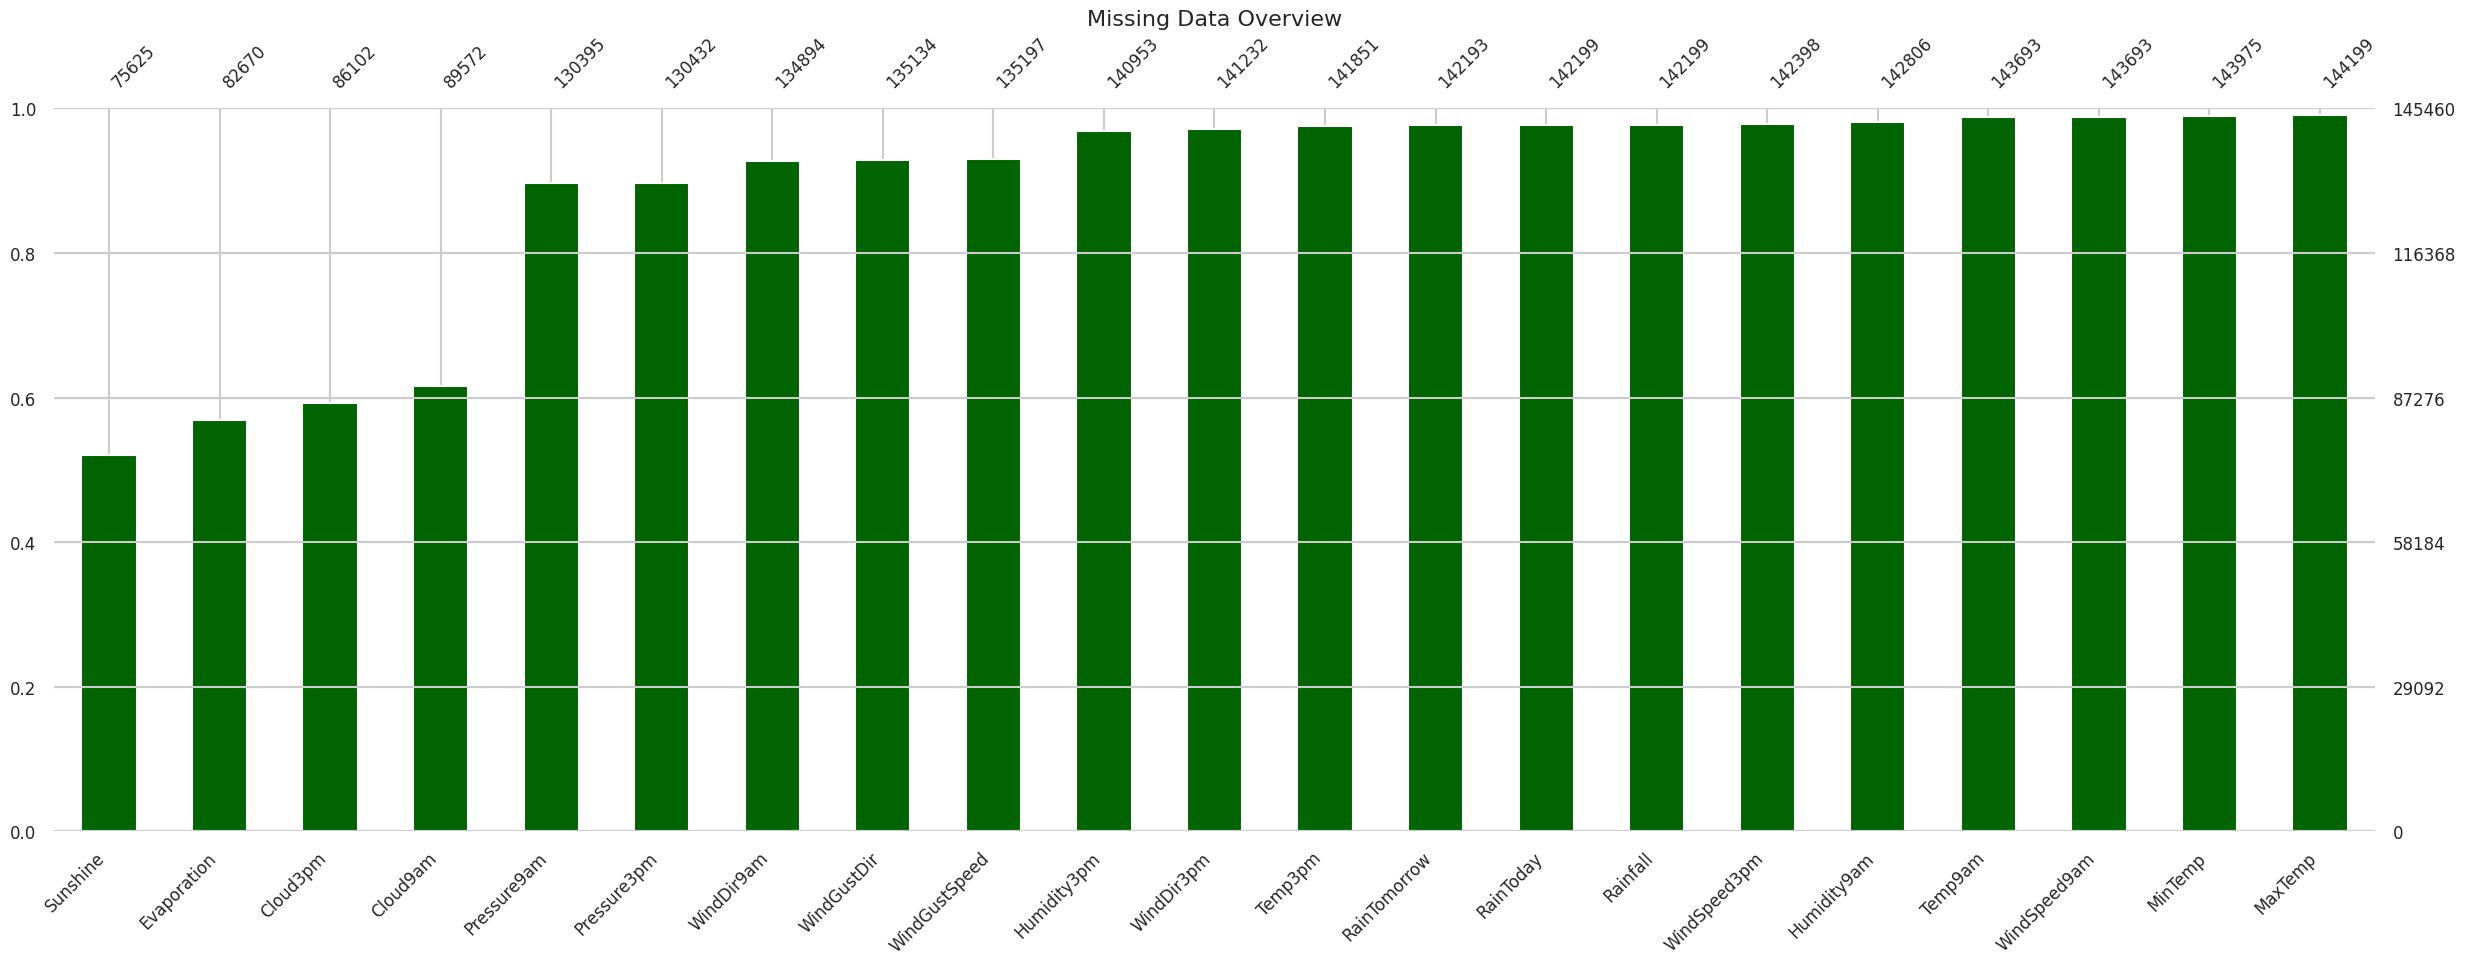

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the missing data bar plot
msno.bar(data[missing.index], color='darkgreen', fontsize=12)

# Add a title
plt.title('Missing Data Overview', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

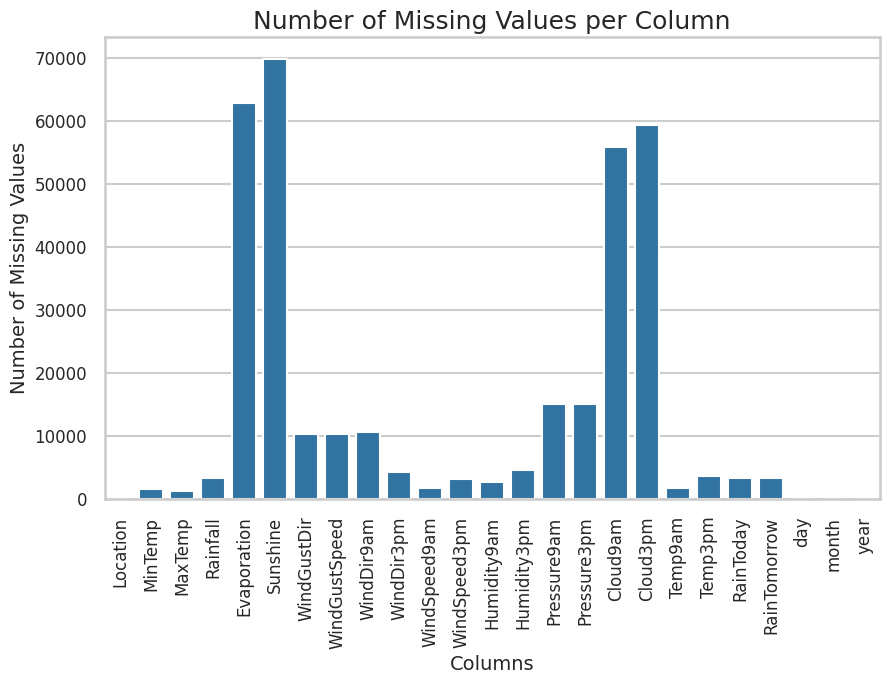

In [ ]:
# Calculate the number of missing values for each column
nalls = data.isna().sum()

# Convert the Series to a DataFrame for easier plotting
nalls_df = nalls.reset_index()
nalls_df.columns = ['Column', 'Missing Values']

# Plotting the missing values
plt.figure(figsize=(10, 6))
sns.barplot(data=nalls_df, x='Column', y='Missing Values')
plt.title('Number of Missing Values per Column')
plt.xticks(rotation=90)
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()

In [ ]:
data.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,W,WNW,20.00,24.00,71.00,22.00,"1,007.70","1,007.10",8.00,NaN,16.90,21.80,No,No,1,12,2008
1,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00,NNW,WSW,4.00,22.00,44.00,25.00,"1,010.60","1,007.80",NaN,NaN,17.20,24.30,No,No,2,12,2008


In [ ]:
# Assuming 'categ_data' contains the categorical columns to fill
col_fill = data.select_dtypes(include='object').columns

# Fill missing values with the mode for each categorical column
data[col_fill] = data[col_fill].fillna(data[col_fill].mode().iloc[0])

In [ ]:
data[col_fill].isna().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,0
RainTomorrow,0


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


# Select only numerical columns
num_cols = data.select_dtypes(include=['number']).columns

# Optional: Log transform skewed column (Rainfall) to reduce extreme values
data['Rainfall'] = np.log1p(data['Rainfall'])

# Step 1: Scale numerical features before using KNN
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Step 2: Apply KNN imputation (K=5)
imputer = KNNImputer(n_neighbors=5)
data[num_cols] = imputer.fit_transform(data[num_cols])

# At this point, missing values in numerical columns are filled
# and data is scaled properly for downstream models


In [ ]:
data[col_fill].isna().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,0
RainTomorrow,0


In [ ]:
# Check total number of missing values now
print("Missing values after filling:")
print(data.isna().sum().sum())


Missing values after filling:
0


### Missing Values Handling Completed

- A missing values visualization was created to understand the distribution of missing data across columns.
- Missing values were handled as follows:
  - **Categorical columns** (non-numerical):
    - Filled missing values with the most frequent value (mode) for each column.
  - **Numerical columns**:
    - Filled missing values using KNN.
- After handling missing values, a final check confirmed that no missing data remains in the dataset.

This step ensures that the dataset is clean and ready for further analysis and modeling.in **clean_data**

In [ ]:
clean_data=data.copy()
clean_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,0.52,0.52,0.08,0.05,0.46,W,0.29,W,WNW,0.15,0.28,0.71,0.22,0.45,0.48,0.89,0.58,0.51,0.52,No,No,0.00,1.00,0.10
1,Albury,0.38,0.57,0.00,0.06,0.72,WNW,0.29,NNW,WSW,0.03,0.25,0.44,0.25,0.50,0.49,0.24,0.51,0.51,0.57,No,No,0.03,1.00,0.10
2,Albury,0.50,0.58,0.00,0.05,0.89,WSW,0.31,W,WSW,0.15,0.30,0.38,0.30,0.45,0.51,0.22,0.22,0.59,0.55,No,No,0.07,1.00,0.10
3,Albury,0.42,0.62,0.00,0.07,0.91,NE,0.14,SE,E,0.08,0.10,0.45,0.16,0.61,0.57,0.22,0.29,0.53,0.61,No,No,0.10,1.00,0.10
4,Albury,0.61,0.70,0.12,0.04,0.60,W,0.27,ENE,NW,0.05,0.23,0.82,0.33,0.50,0.46,0.78,0.89,0.53,0.67,No,No,0.13,1.00,0.10


## Handling Oultiers

### Winsorize Method For Handling Outliers

In [ ]:
from scipy.stats.mstats import winsorize

# light Winsorize (1%, 1%)
light_col = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure3pm', 'Pressure9am', 'Temp9am', 'Temp3pm']
for col in light_col:
    clean_data[col] = winsorize(clean_data[col], (0.01, 0.01)).data

# Rainfall : Winsorize top 1% only (0, 0.01),
clean_data['Rainfall'] = winsorize(clean_data['Rainfall'], (0, 0.01)).data

# Evaporation, Sunshine (5%, 5%)
clean_data['Evaporation'] = winsorize(clean_data['Evaporation'], (0.05, 0.05)).data
clean_data['Sunshine'] = winsorize(clean_data['Sunshine'], (0.05, 0.05)).data

# Humidity9am, Humidity3pm, Cloud9am, Cloud3pm : no Winsorizing


In [ ]:
# Saving the cleaned data
#data.to_csv('cleaned_rain_data_imput.csv', index=False)


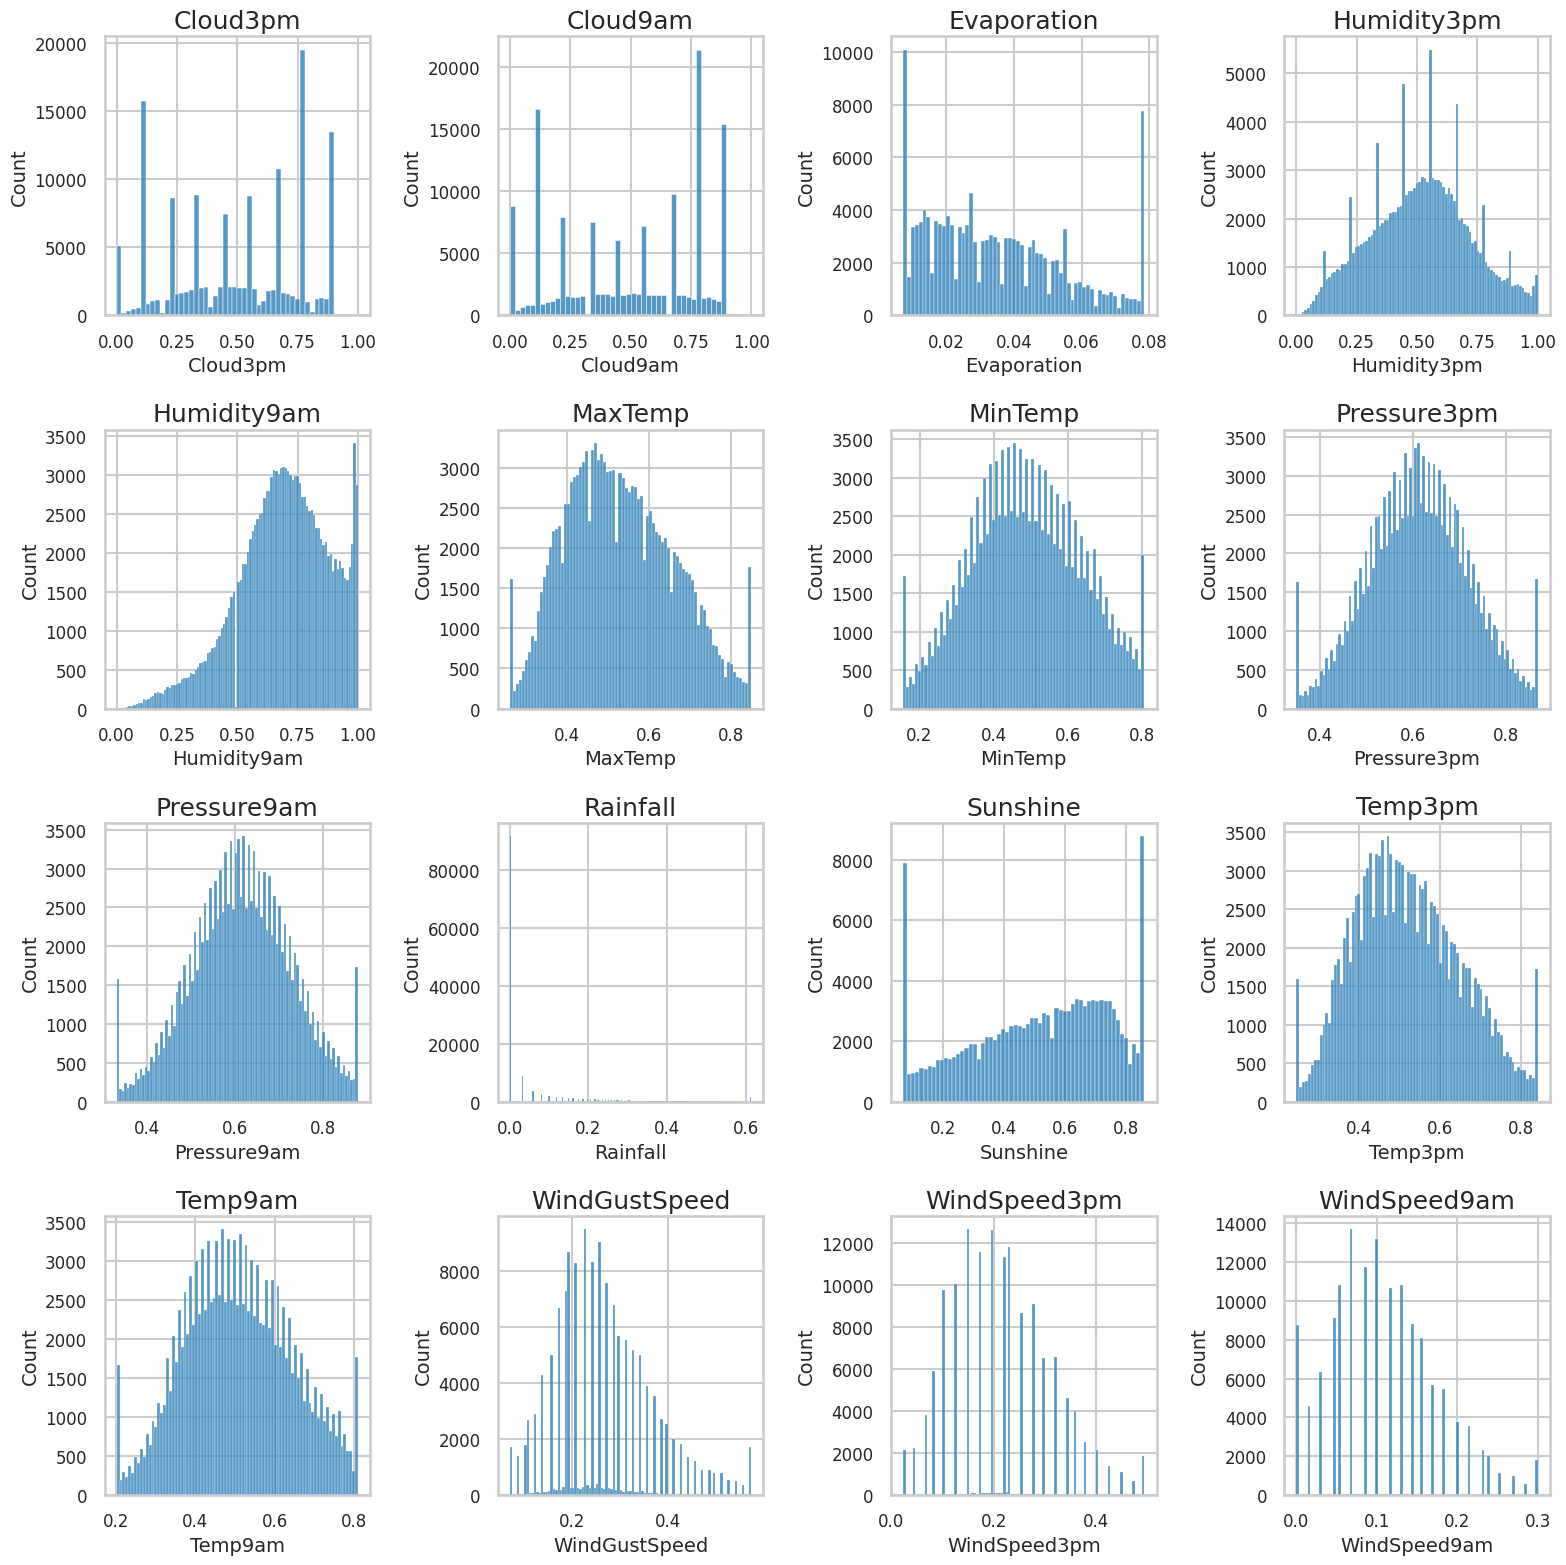

In [ ]:
num_col = clean_data.select_dtypes(include=['number']).columns.difference(['day', 'month', 'year']).tolist()
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for i, col in enumerate(num_col):
    sns.histplot(data=clean_data, x=col, ax=ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_title(col)
plt.tight_layout()

`Rainfall` is very skewed. around(62%) of the dataset have 0 rainfall

Many days have 0 mm rain (no rain).

A few days have very large values (100 mm, 200 mm or even more).
*heavy rainfall might look like an outlier but is real*

# Task: Analyze the Effect of Windspeeds and Humidity on the Likelihood of Rain

**Author:** Mohamed Mahmoud Al-Saragi

## Objective
Analyze the relationship between humidity levels and wind speeds in relation to the likelihood of rain.

## Research Question
Is higher humidity or certain wind speeds related to rain?

## Name : Mohamed Mahmoud Mossad Elseragy

In [ ]:
# Convert "Yes" to 1 and "No" to 0 in the 'RainTomorrow' column
clean_data['RainTomorrow'] = clean_data['RainTomorrow'].map({'Yes': 1, 'No': 0})  # Encoding categorical values for correlation

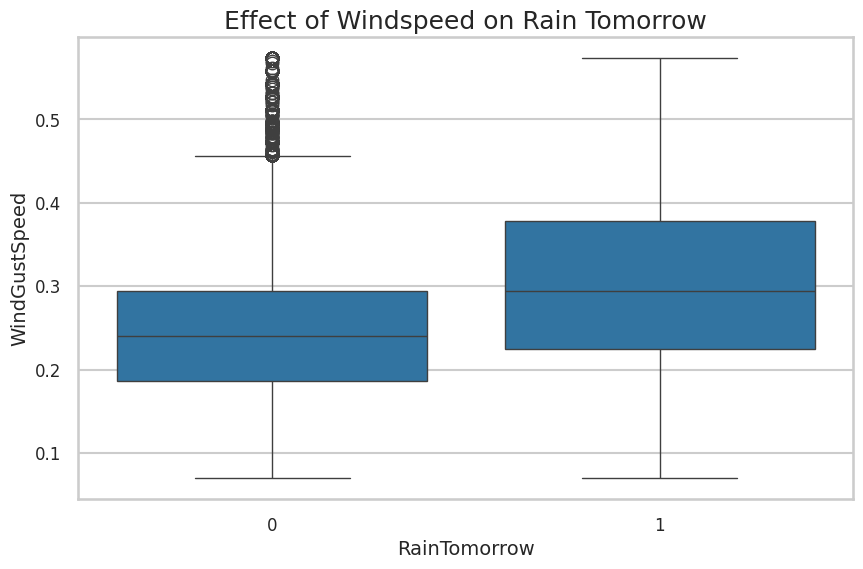

In [ ]:
plt.figure(figsize=(10,6))  # Set the size of the figure
sns.boxplot(x='RainTomorrow', y='WindGustSpeed', data=clean_data)  # Create a boxplot to compare wind gust speed by rain outcome
plt.title('Effect of Windspeed on Rain Tomorrow')  # Add a title to the plot
plt.show()  # Display the plot



### Boxplot: Windspeed vs Rain Tomorrow

This boxplot shows the windspeed for two groups:

- `0` = No rain tomorrow  
- `1` = Rain tomorrow

Each box shows how windspeed is spread in each group.  
The dots are outliers (very high or low wind speeds).

The plot helps us compare windspeed between rainy and non-rainy days.

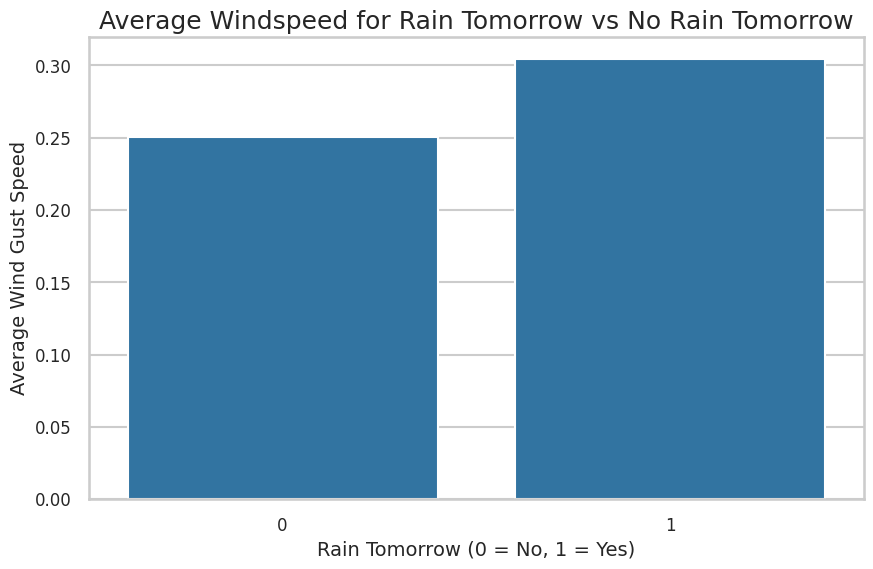

In [ ]:
grouped_data = clean_data.groupby('RainTomorrow')['WindGustSpeed'].mean()  # Calculate the mean wind gust speed for each RainTomorrow class

# Plot the relationship between RainTomorrow and average WindGustSpeed
plt.figure(figsize=(10,6))  # Set the figure size
sns.barplot(x=grouped_data.index, y=grouped_data.values)  # Create a bar plot of average wind gust speed per rain category
plt.title('Average Windspeed for Rain Tomorrow vs No Rain Tomorrow')  # Add a title to the plot
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)')  # Label x-axis
plt.ylabel('Average Wind Gust Speed')  # Label y-axis
plt.show()  # Display the plot



### Bar Chart: Average Windspeed for Rain Tomorrow vs No Rain Tomorrow

This chart shows the **average windspeed** for two groups:

- `0` = No rain tomorrow  
- `1` = Rain tomorrow

We can use it to compare the typical windspeed in rainy vs non-rainy days.


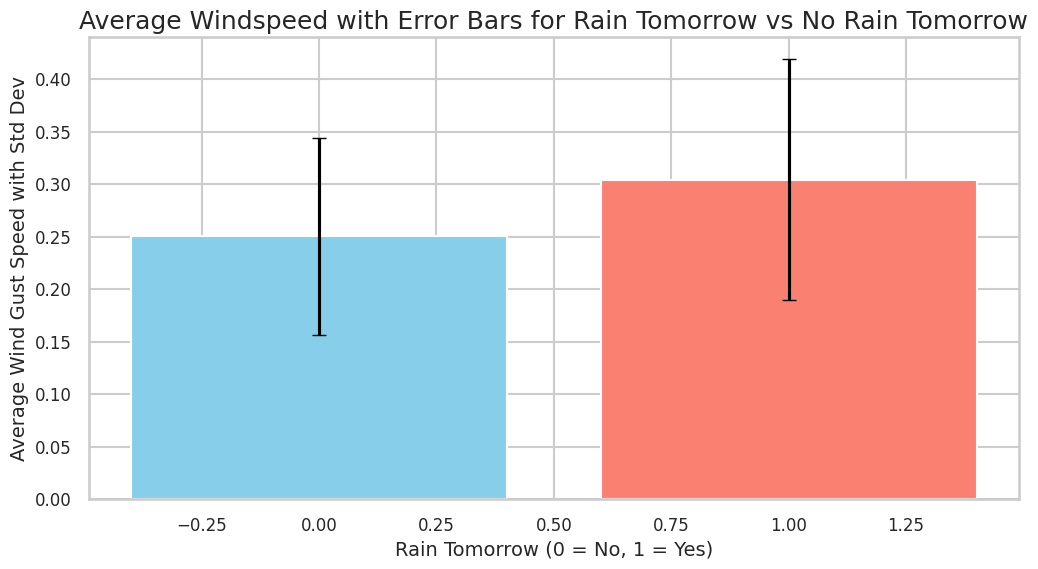

In [ ]:
# Use GroupBy to calculate mean, standard deviation, and count
grouped_data = clean_data.groupby('RainTomorrow')['WindGustSpeed'].agg(['mean', 'std', 'count'])  # Aggregating statistics for each group

# Create bar plot with error bars using plt.bar
plt.figure(figsize=(12,6))  # Set figure size

# Plot bars with error bars (standard deviation)
plt.bar(grouped_data.index, grouped_data['mean'], yerr=grouped_data['std'], capsize=5, color=['skyblue', 'salmon'])  # Bar plot with error bars

# Add title and axis labels
plt.title('Average Windspeed with Error Bars for Rain Tomorrow vs No Rain Tomorrow')  # Plot title
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)')  # X-axis label
plt.ylabel('Average Wind Gust Speed with Std Dev')  # Y-axis label

plt.show()  # Display the plot



### Bar Chart: Average Wind Gust Speed with Error Bars

This bar chart shows the **average wind gust speed** for:

- `0` = No rain tomorrow  
- `1` = Rain tomorrow

Each bar includes an **error bar** showing the **standard deviation**, which helps understand how much variation there is in wind gust speeds within each group.


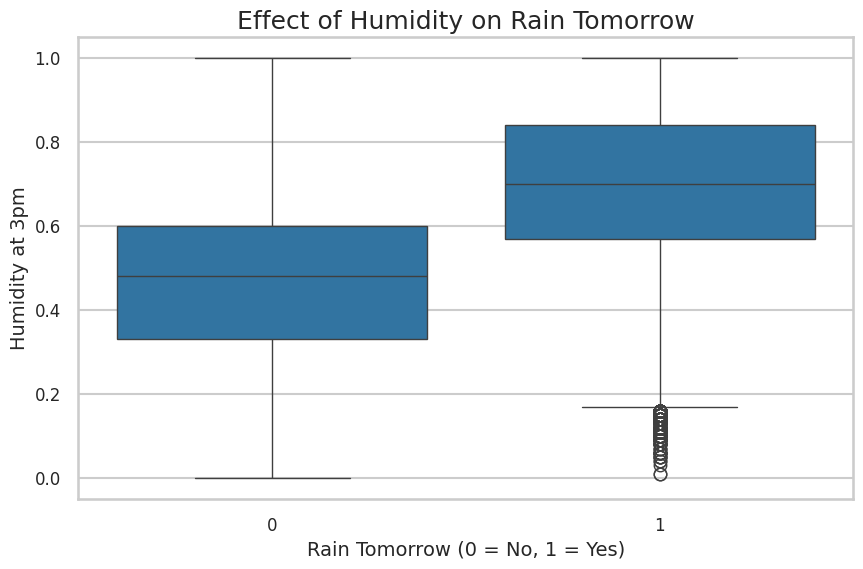

              Humidity3pm  RainTomorrow
Humidity3pm          1.00          0.44
RainTomorrow         0.44          1.00


In [ ]:
plt.figure(figsize=(10,6))  # Set the figure size
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=clean_data)  # Create a boxplot to show humidity distribution by rain outcome
plt.title('Effect of Humidity on Rain Tomorrow')  # Add a title
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)')  # Label x-axis
plt.ylabel('Humidity at 3pm')  # Label y-axis
plt.show()  # Display the plot

# Calculate correlation between Humidity at 3pm and RainTomorrow
correlation_humidity = clean_data[['Humidity3pm', 'RainTomorrow']].corr()  # Compute correlation matrix
print(correlation_humidity)  # Print the correlation result

### Boxplot: Humidity at 3pm vs Rain Tomorrow

This boxplot shows how humidity at 3pm varies between two groups:

- `0` = No rain tomorrow  
- `1` = Rain tomorrow

It helps us see if humidity levels are different when rain is expected.


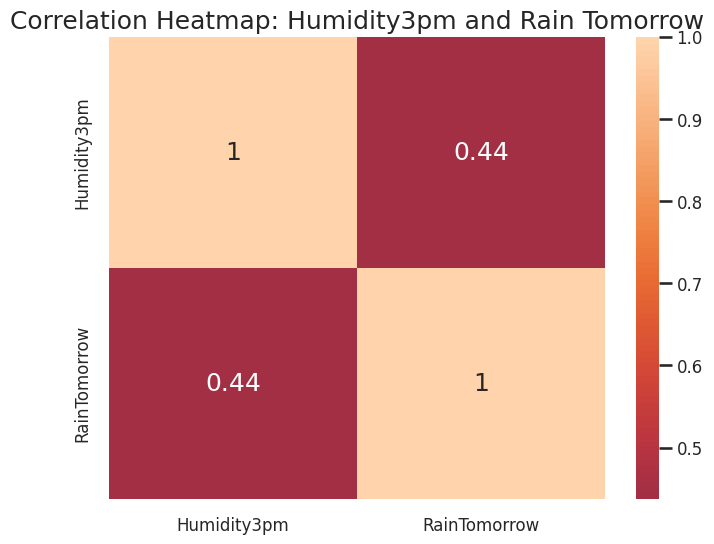

In [ ]:
# Plot heatmap for the correlation between Humidity3pm and RainTomorrow
plt.figure(figsize=(8,6))  # Set figure size
sns.heatmap(correlation_humidity, annot=True, center=0)  # Draw heatmap with correlation values and color gradient
plt.title('Correlation Heatmap: Humidity3pm and Rain Tomorrow')  # Add a title
plt.show()  # Display the plot


### Correlation Heatmap: Humidity at 3pm and Rain Tomorrow

This heatmap shows the correlation between:

- `Humidity3pm`: Humidity level at 3 PM
- `RainTomorrow`: Whether it will rain tomorrow (0 = No, 1 = Yes)

The color shows the strength and direction of the correlation:
- Positive values → higher humidity is linked to rain
- Negative values → higher humidity is linked to no rain
- Values near 0 → weak or no correlation


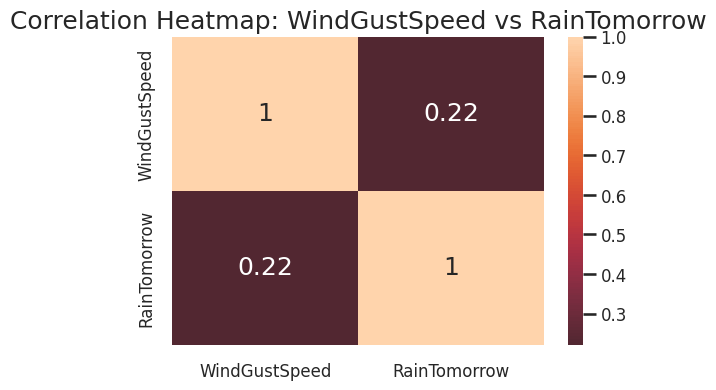

In [ ]:
# Calculate the correlation matrix
correlation_wind = clean_data[['WindGustSpeed', 'RainTomorrow']].corr()  # Compute correlation between WindGustSpeed and RainTomorrow

# Plot Heatmap
plt.figure(figsize=(6,4))  # Set the figure size
sns.heatmap(correlation_wind, annot=True, center=0)  # Draw heatmap with annotations and color map
plt.title('Correlation Heatmap: WindGustSpeed vs RainTomorrow')  # Add a title to the heatmap
plt.show()  # Display the plot


### Correlation Heatmap: Wind Gust Speed and Rain Tomorrow

This heatmap shows the correlation between:

- `WindGustSpeed`: The wind gust speed  
- `RainTomorrow`: Whether it will rain tomorrow (0 = No, 1 = Yes)

The color indicates how strong and in what direction the correlation is:
- Positive → Higher wind gust speed is linked to more chance of rain  
- Negative → Higher wind gust speed is linked to less chance of rain  
- Near zero → Weak or no correlation


#  Does lower/higher temperature affect the probability of rain?

In [ ]:
sns.boxplot(x='RainTomorrow', y='MinTemp', data=clean_data,whis=2)
plt.title("Distribution of MinTemp by RainTomorrow")
plt.show()

In [ ]:
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=clean_data, whis=2.5)
plt.title("Distribution of MaxTemp by RainTomorrow")
plt.show()

In [ ]:
clean_data.groupby('RainTomorrow')['MinTemp'].mean()

,MinTemp
RainTomorrow,
0,0.48
1,0.51


In [ ]:
clean_data.groupby('RainTomorrow')['MaxTemp'].mean()

,MaxTemp
RainTomorrow,
0,0.54
1,0.49


In [ ]:
from scipy.stats import ttest_ind

# Split data into two groups
no_rain = clean_data[clean_data['RainTomorrow'] == 'No']['MinTemp']
yes_rain = clean_data[clean_data['RainTomorrow'] == 'Yes']['MinTemp']

# Perform t-test
t_stat, p_value = ttest_ind(no_rain, yes_rain, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: nan, P-value: nan


In [ ]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,0.52,0.52,0.08,0.05,0.46,W,0.29,W,WNW,0.15,0.28,0.71,0.22,0.45,0.48,0.89,0.58,0.51,0.52,No,No,0.00,1.00,0.10
1,Albury,0.38,0.57,0.00,0.06,0.72,WNW,0.29,NNW,WSW,0.03,0.25,0.44,0.25,0.50,0.49,0.24,0.51,0.51,0.57,No,No,0.03,1.00,0.10
2,Albury,0.50,0.58,0.00,0.05,0.89,WSW,0.31,W,WSW,0.15,0.30,0.38,0.30,0.45,0.51,0.22,0.22,0.59,0.55,No,No,0.07,1.00,0.10
3,Albury,0.42,0.62,0.00,0.07,0.91,NE,0.14,SE,E,0.08,0.10,0.45,0.16,0.61,0.57,0.22,0.29,0.53,0.61,No,No,0.10,1.00,0.10
4,Albury,0.61,0.70,0.12,0.04,0.60,W,0.27,ENE,NW,0.05,0.23,0.82,0.33,0.50,0.46,0.78,0.89,0.53,0.67,No,No,0.13,1.00,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,0.27,0.53,0.00,0.01,0.51,E,0.19,SE,ENE,0.10,0.13,0.51,0.24,0.73,0.69,0.49,0.47,0.36,0.53,No,No,0.67,0.45,1.00
145456,Uluru,0.29,0.57,0.00,0.02,0.52,NNW,0.12,SE,N,0.10,0.10,0.56,0.21,0.71,0.67,0.38,0.40,0.38,0.57,No,No,0.70,0.45,1.00
145457,Uluru,0.33,0.60,0.00,0.03,0.61,N,0.24,SE,WNW,0.07,0.10,0.53,0.24,0.67,0.64,0.56,0.51,0.42,0.60,No,No,0.73,0.45,1.00
145458,Uluru,0.38,0.60,0.00,0.03,0.61,SE,0.17,SSE,N,0.10,0.08,0.51,0.24,0.64,0.63,0.33,0.22,0.47,0.60,No,No,0.77,0.45,1.00


In [ ]:


t_stat_max, p_value_max = ttest_ind(
    clean_data[clean_data['RainTomorrow'] == 'No']['MaxTemp'],
    clean_data[clean_data['RainTomorrow'] == 'Yes']['MaxTemp'],
    nan_policy='omit'
)

print(f"MaxTemp: T-statistic={t_stat_max}, P-value={p_value_max}")


MaxTemp: T-statistic=nan, P-value=nan


##  Exploratory Data Analysis (EDA) &  Seasonal and Location-Based Rain Patterns
In this section, we will perform exploratory analysis to better understand the dataset and investigate how seasonality and geographic location influence the likelihood of rain tomorrow.


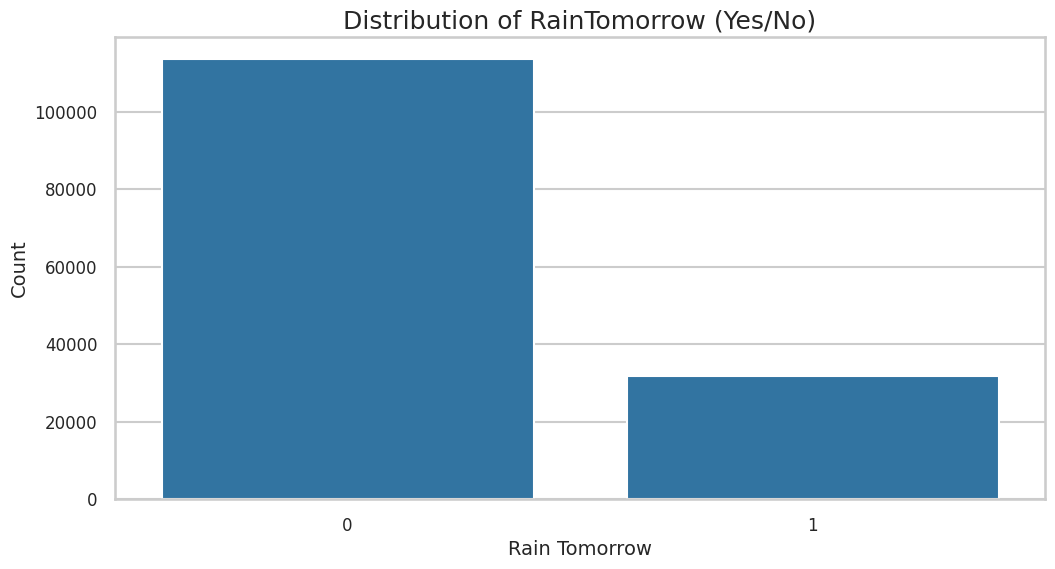

In [ ]:


sns.countplot(x='RainTomorrow', data=clean_data)
plt.title('Distribution of RainTomorrow (Yes/No)')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.show()


###  Observation
The dataset is **imbalanced**, with significantly more 'No' values than 'Yes' in the `RainTomorrow` column.  
This class imbalance may affect the performance of classification models, and it should be addressed using techniques such as:
- **Resampling (oversampling/undersampling)**
- **Class weights**
- **Evaluation metrics like F1-score or ROC-AUC instead of accuracy**


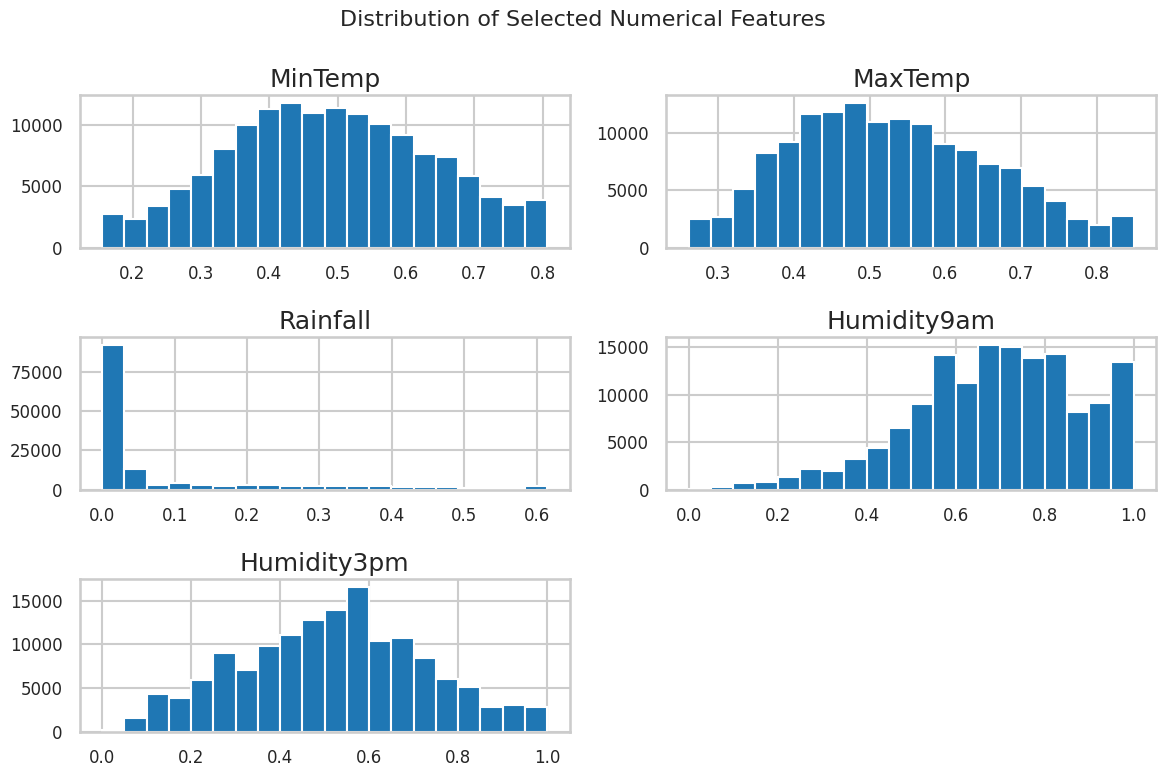

In [ ]:
selected_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm']
clean_data[selected_features].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribution of Selected Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


###  Observation
The distributions of the selected numerical features show varying shapes:

- `MinTemp` and `MaxTemp` appear to follow a roughly **normal distribution**.
- `Rainfall` is **highly skewed to the right**, indicating that most days have little or no rain.
- `Humidity3pm` and `Humidity9am` show **slight skewness**, with a concentration of values on the higher side.

Understanding these distributions is important for preprocessing, especially when applying algorithms sensitive to feature scales or distributions.


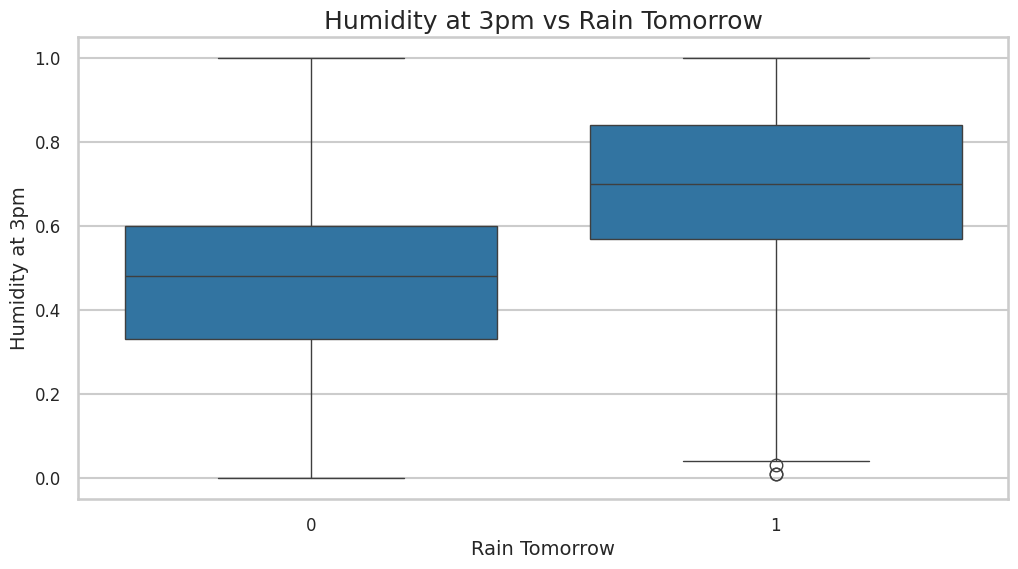

In [ ]:
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=clean_data, whis=2)
plt.title('Humidity at 3pm vs Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Humidity at 3pm')
plt.show()


###  Observation
There is a clear difference in **humidity levels at 3pm** based on whether it rains the next day:

- Days labeled **'Yes'** for `RainTomorrow` generally have **higher humidity** at 3pm.
- This suggests that **humidity3pm** is a potentially strong **predictive feature** for rainfall.

Also, there are a few outliers, but the trend remains consistent and useful for modeling.


##  Seasonal and  Location-Based Analysis of RainTomorrow
We will convert the Date column to datetime format, extract the month and season, and analyze how rain occurrence varies by season and location.


In [ ]:
clean_data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

In [ ]:

def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

clean_data['Season'] = data['month'].apply(get_season)


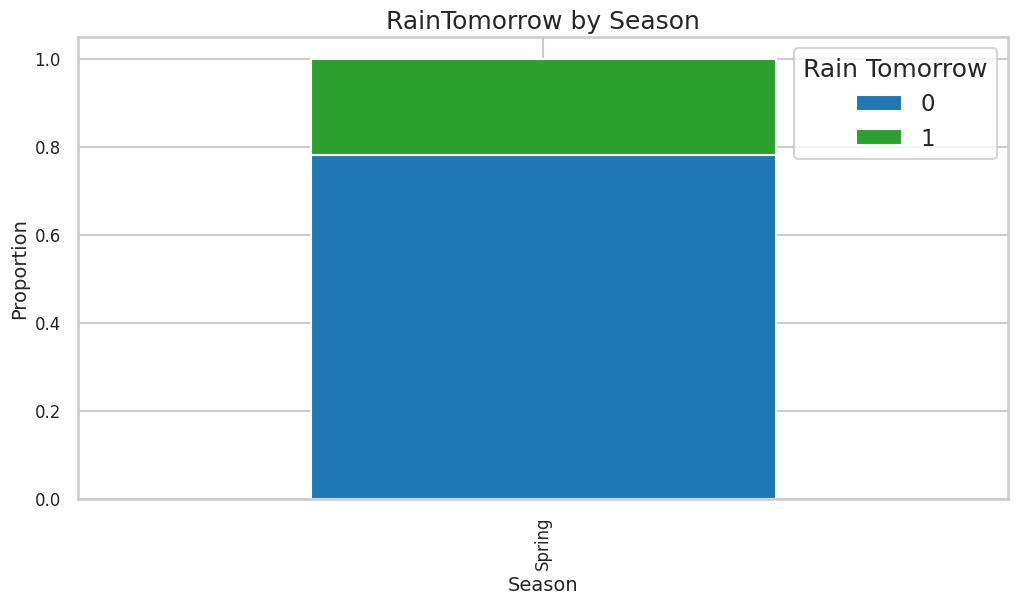

In [ ]:
season_rain = clean_data.groupby('Season')['RainTomorrow'].value_counts(normalize=True).unstack()
season_rain.plot(kind='bar', stacked=True)
plt.title('RainTomorrow by Season')
plt.ylabel('Proportion')
plt.xlabel('Season')
plt.legend(title='Rain Tomorrow')
plt.show()


###  Observation
The likelihood of rain varies significantly across the **seasons**:

- **Winter** and **Autumn** show a **higher proportion of 'Yes'** values for `RainTomorrow`.
- In contrast, **Summer** and **Spring** have a much **lower chance of rain**.

This confirms that **seasonality plays a key role** in rainfall prediction, and including `Season` as a feature may improve model accuracy.


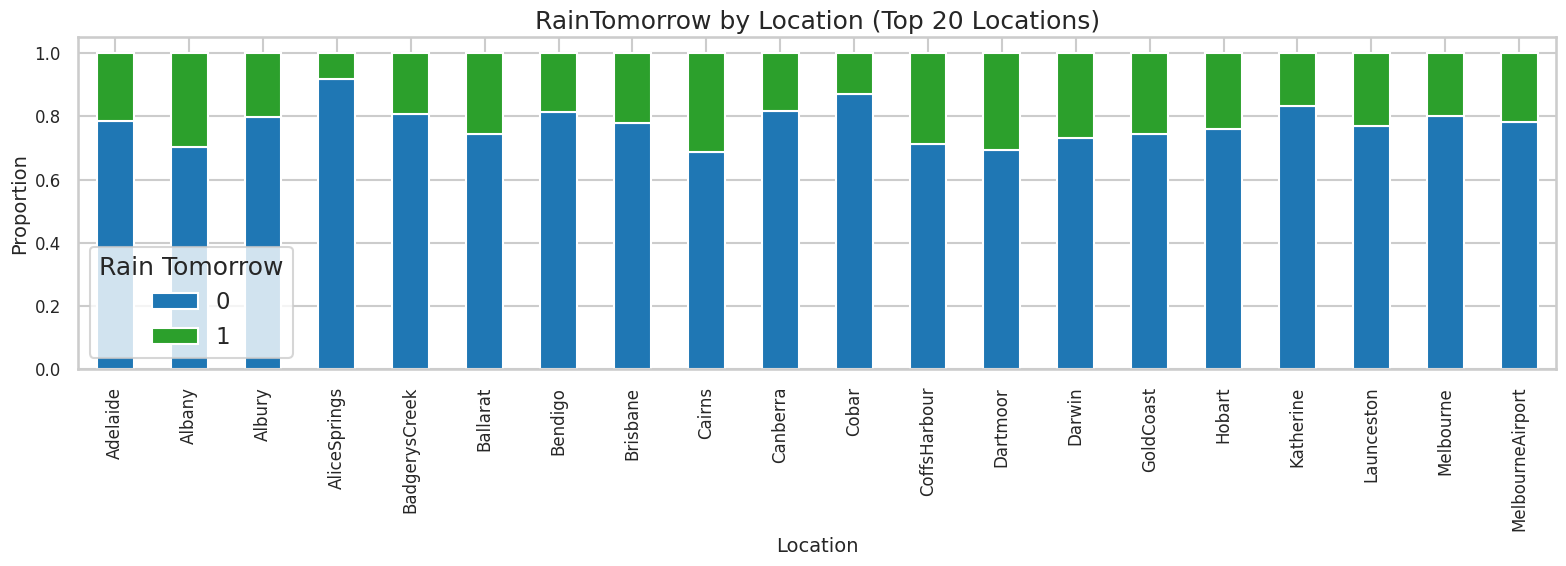

In [ ]:
location_rain = clean_data.groupby('Location')['RainTomorrow'].value_counts(normalize=True).unstack()
location_rain.head(20).plot(kind='bar', stacked=True, figsize=(16, 6))
plt.title('RainTomorrow by Location (Top 20 Locations)')
plt.ylabel('Proportion')
plt.xlabel('Location')
plt.legend(title='Rain Tomorrow')
plt.tight_layout()
plt.show()


###  Observation
There is a clear **geographical variation** in the probability of rain:

- Some locations such as **Cairns**, **Darwin**, and **Portland** have a **higher likelihood** of rain the next day.
- Others like **AliceSprings** or **Woomera** show a **much lower probability** of rain.

This indicates that **Location is a strong predictive factor**, and models should account for location-based differences in weather patterns.


###  Insights:
- RainTomorrow shows class imbalance: more 'No' than 'Yes'.
- Rain is more likely in **Winter** and **Autumn**, and less likely in **Summer**.
- There is significant variation across locations. Some areas are more prone to rain than others.
- Seasonal and locational patterns can be valuable features for predictive modeling.

 Next steps: Explore correlation between features and build a predictive model using Machine Learning.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

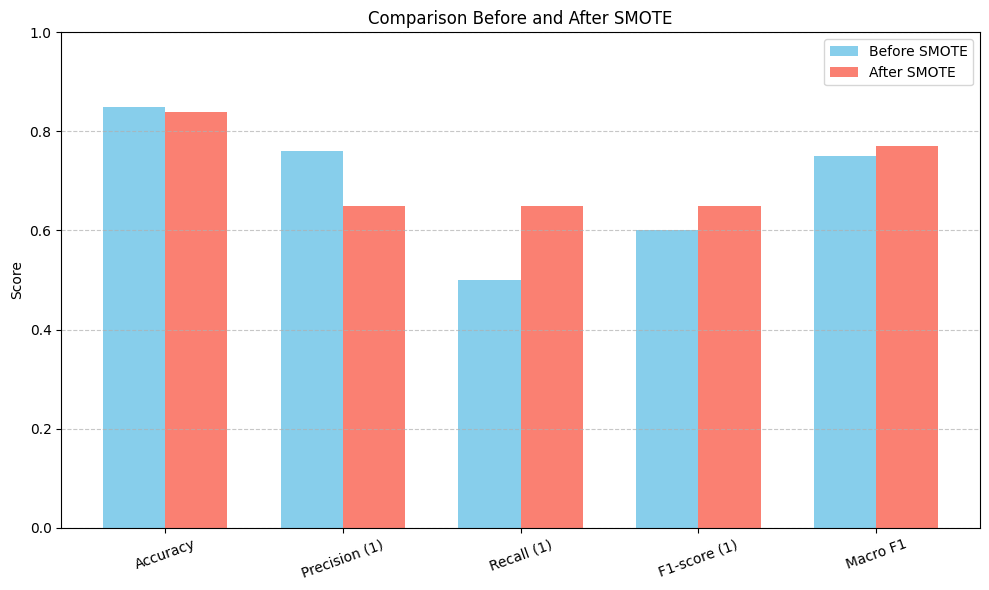

In [2]:
metrics = ['Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)', 'Macro F1']
before = [0.85, 0.76, 0.50, 0.60, 0.75]
after  = [0.84, 0.65, 0.65, 0.65, 0.77]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, before, width, label='Before SMOTE', color='skyblue')
plt.bar(x + width/2, after, width, label='After SMOTE', color='salmon')

plt.ylabel('Score')
plt.title('Comparison Before and After SMOTE')
plt.xticks(x, metrics, rotation=20)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


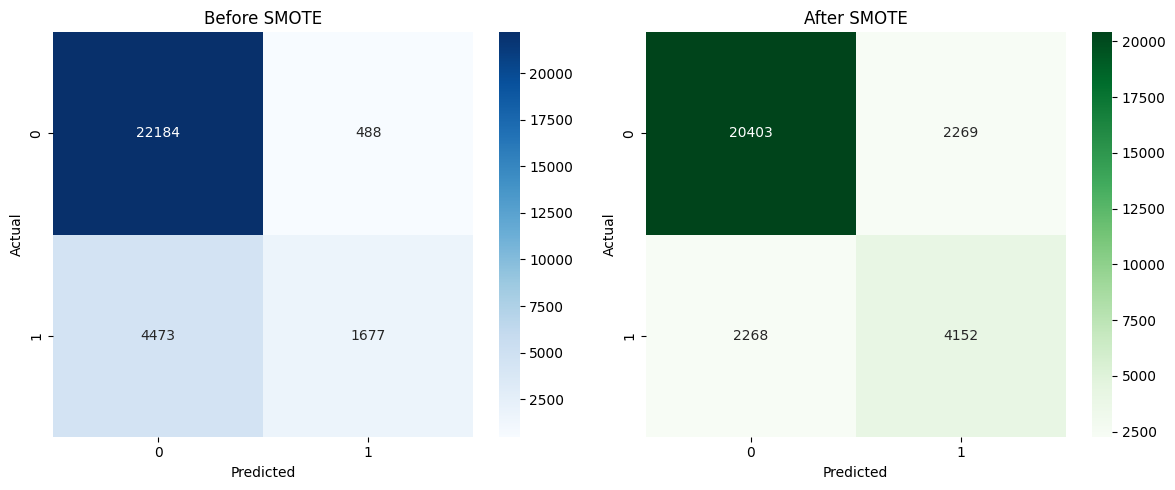

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Replace with your values
cm_before = [[22184, 488], [4473, 1677]]
cm_after  = [[20403, 2269], [2268, 4152]]

sns.heatmap(cm_before, annot=True, fmt='d', ax=axs[0], cmap='Blues')
axs[0].set_title('Before SMOTE')
axs[0].set_xlabel('Predicted'); axs[0].set_ylabel('Actual')

sns.heatmap(cm_after, annot=True, fmt='d', ax=axs[1], cmap='Greens')
axs[1].set_title('After SMOTE')
axs[1].set_xlabel('Predicted'); axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


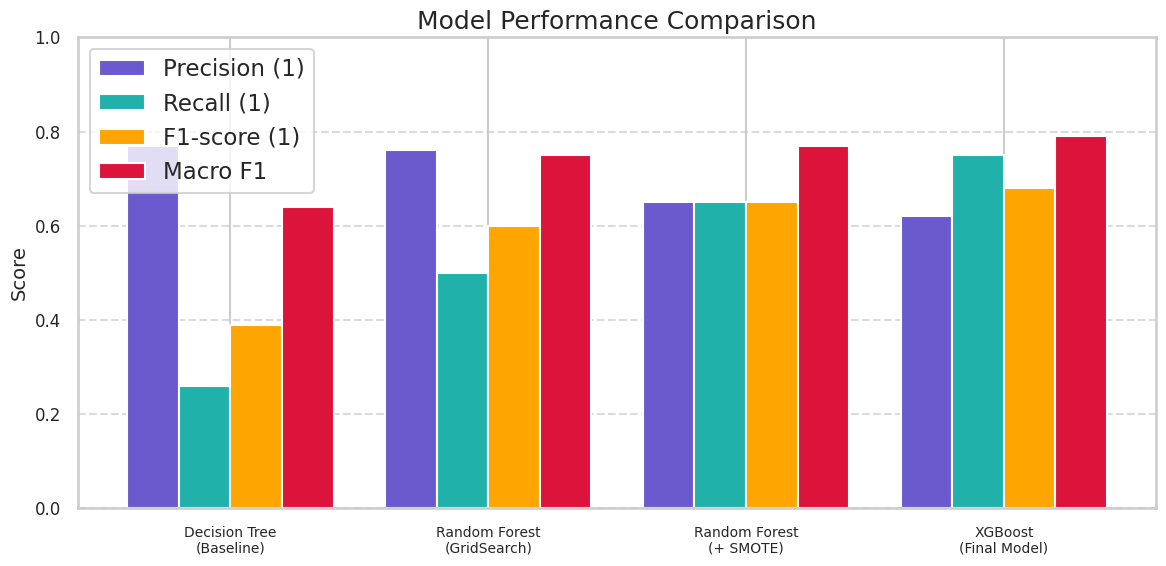

In [ ]:
models = [
    'Decision Tree\n(Baseline)',
    'Random Forest\n(GridSearch)',
    'Random Forest\n(+ SMOTE)',
    'XGBoost\n(Final Model)'
]


precision_1 = [0.77, 0.76, 0.65, 0.62]
recall_1    = [0.26, 0.50, 0.65, 0.75]
f1_1        = [0.39, 0.60, 0.65, 0.68]
macro_f1    = [0.64, 0.75, 0.77, 0.79]


x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12, 6))

plt.bar(x - 1.5*width, precision_1, width, label='Precision (1)', color='#6A5ACD')
plt.bar(x - 0.5*width, recall_1,    width, label='Recall (1)', color='#20B2AA')
plt.bar(x + 0.5*width, f1_1,        width, label='F1-score (1)', color='#FFA500')
plt.bar(x + 1.5*width, macro_f1,    width, label='Macro F1', color='#DC143C')


plt.xticks(x, models, fontsize=10)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


# Model Comparison Summary

## Dataset Overview
- Imbalanced dataset with ~145,000 samples and 32 features.
- Target distribution: 0 (No) ~75%, 1 (Yes) ~25%.
- Goal: Build a model that balances Precision and Recall, especially for predicting "Yes" correctly.

---

## 1. Decision Tree (Baseline)
- **Accuracy**: 0.82  
- **Precision (1)**: 0.77  
- **Recall (1)**: 0.26  
- **F1-score (1)**: 0.39  

**Observation**: Very high precision, but extremely low recall. The model fails to identify most positive cases.

---

## 2. Random Forest (with GridSearch)
- **Accuracy**: 0.85  
- **Precision (1)**: 0.76  
- **Recall (1)**: 0.50  
- **F1-score (1)**: 0.60  

**Observation**: Better recall than the Decision Tree, but still misses many positive cases.

---

## 3. Random Forest + SMOTE
- **Accuracy**: 0.84  
- **Precision (1)**: 0.65  
- **Recall (1)**: 0.65  
- **F1-score (1)**: 0.65  

**Observation**: Balanced results after using SMOTE. Improves recall significantly but reduces precision.

---

## 4. XGBoost (Final Model)
- **Accuracy**: 0.84  
- **Precision (1)**: 0.62  
- **Recall (1)**: 0.75  
- **F1-score (1)**: 0.68  
- **AUC-PR**: 0.76  

**Observation**: Best recall and overall F1-score among all models. Balanced and consistent performance.

---

## Final Decision
**Selected Model**: XGBoost  
**Reason**: It provides the best trade-off between Precision and Recall, especially for the minority class.  
It is also efficient for large datasets and suitable for deployment in Streamlit.

